Reading File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df=pd.read_excel('C:/Users/Alekh/Downloads/Bank_Personal_Loan_Modelling-1.xlsx',sheet_name=1)
df.head()
print(df['Personal Loan'].value_counts())
df[df['Personal Loan']==1]['Personal Loan'].count()/df['Personal Loan'].count()

0    4520
1     480
Name: Personal Loan, dtype: int64


0.096

### 1. Data pre-processing

Finding Missing values

In [3]:
df.isnull().any()

ID                       False
Age (in years)           False
Experience (in years)    False
Income (in K/month)      False
ZIP Code                 False
Family members            True
CCAvg                    False
Education                False
Mortgage                 False
Personal Loan            False
Securities Account       False
CD Account               False
Online                   False
CreditCard               False
dtype: bool

In [4]:
print(df['Family members'].value_counts())

print(df['Family members'].isna().sum())

df[df['Family members'].isna()]

1.0    1464
2.0    1292
4.0    1217
3.0    1009
Name: Family members, dtype: int64
18


,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
20,21,56,31,25,94015,NaN,0.9,2,111,0,0,0,1,0
58,59,28,2,93,94065,NaN,0.2,1,0,0,0,0,0,0
98,99,49,23,94,92374,NaN,0.3,1,0,0,0,0,1,0
161,162,61,35,80,95053,NaN,2.8,1,0,0,0,0,1,0
235,236,38,8,71,94720,NaN,1.8,3,0,0,0,0,1,0
289,290,42,15,24,92121,NaN,1.0,2,0,0,0,0,1,1
487,488,39,13,88,94117,NaN,1.4,2,0,0,0,0,1,1
721,722,49,24,39,92717,NaN,1.4,3,0,0,0,0,1,0
1460,1461,40,16,85,92677,NaN,0.2,3,0,0,0,0,1,1
1461,1462,54,28,48,93022,NaN,0.2,1,0,0,0,0,1,0


Treating missing values

Since there are only 18 missing values out of 5k records & Distribution of Family members column is balanced thus deleting the missing values seems better approach rather than replacing it with mode(i.e. 1)

In [5]:
df=df.dropna()

In [6]:
print(df.shape[0])
print(df['Personal Loan'].value_counts())
df[df['Personal Loan']==1]['Personal Loan'].count()/df['Personal Loan'].count()

4982
0    4504
1     478
Name: Personal Loan, dtype: int64


0.09594540345242875

Checking Outliers

                        count          mean          std     min       25%  \
ID                     4982.0   2502.352268  1441.813138     1.0   1254.25   
Age (in years)         4982.0     45.327178    11.470821    23.0     35.00   
Experience (in years)  4982.0     20.096146    11.475636    -3.0     10.00   
Income (in K/month)    4982.0     73.732637    46.040144     8.0     39.00   
ZIP Code               4982.0  93152.523485  2123.021796  9307.0  91911.00   
Family members         4982.0      2.397230     1.147160     1.0      1.00   
CCAvg                  4982.0      1.939962     1.748566     0.0      0.70   
Education              4982.0      1.880971     0.839740     1.0      1.00   
Mortgage               4982.0     56.546367   101.756369     0.0      0.00   
Personal Loan          4982.0      0.095945     0.294546     0.0      0.00   
Securities Account     4982.0      0.104175     0.305518     0.0      0.00   
CD Account             4982.0      0.060217     0.237912     0.0

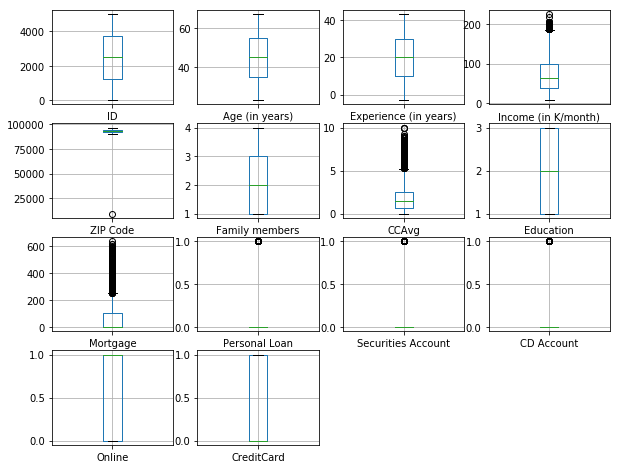

In [7]:


df_desc=df.describe().T
df_desc['upper_bound']=df_desc['mean']+(1.5*(df_desc['75%']-df_desc['25%']))
df_desc['lower_bound']=df_desc['mean']-(1.5*(df_desc['75%']-df_desc['25%']))
print(df_desc)
print(df.shape[1])

## Box plots
plt.figure(figsize=(10,8))
for i,z in zip(range(df.shape[1]),df.columns):
    plt.subplot(4,4,i+1)
    df.boxplot(column=z)

Outliers in the following columns:-
    Income
    CCAvg
    Mortgage

In [ ]:
#Code is not executed as outliers are not removed but instead capped
#def remove_outlier(df_in, col_name):
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#   low  = q1-1.5*iqr
#  high = q3+1.5*iqr
#    output = pd.DataFrame(df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)])
#    return output
#
#for col_name in ['Income (in K/month)','CCAvg','Mortgage']:
#    df=remove_outlier(df,col_name)
#
##number of outliers removed
#print(4982-df.shape[0])
# #total records removed bcoz of outliers or missing values
#print(5000-df.shape[0])
#print(df.shape)
#
#print(df['Personal Loan'].value_counts())
#df[df['Personal Loan']==1]['Personal Loan'].count()/df['Personal Loan'].count()
#
##number of outliers removed
#print(4982-df.shape[0])
##total records removed bcoz of outliers or missing values
#print(5000-df.shape[0])
#print(df.shape)
#
#print(df['Personal Loan'].value_counts())
#df[df['Personal Loan']==1]['Personal Loan'].count()/df['Personal Loan'].count()
#
##Post removing the outliers and missing value the Personal Loan gets undersampled and decreases from 9.6% to 6.1% 
##thus we should not remove outliers but instead cap them 


In [8]:
df_max = df.copy(deep = True)

df_max.loc[df_max['Income (in K/month)']>162, 'Income (in K/month)'] = 162
df_max.loc[df_max['CCAvg']>5, 'CCAvg'] = 5
df_max.loc[df_max['Mortgage']>208, 'Mortgage'] = 208
df=df_max

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4982.0,2502.352268,1441.813138,1.0,1254.25,2502.5,3749.75,5000.0
Age (in years),4982.0,45.327178,11.470821,23.0,35.00,45.0,55.00,67.0
Experience (in years),4982.0,20.096146,11.475636,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),4982.0,72.551184,43.351022,8.0,39.00,64.0,98.00,162.0
ZIP Code,4982.0,93152.523485,2123.021796,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,4982.0,2.397230,1.147160,1.0,1.00,2.0,3.00,4.0
CCAvg,4982.0,1.819348,1.421232,0.0,0.70,1.5,2.50,5.0
Education,4982.0,1.880971,0.839740,1.0,1.00,2.0,3.00,3.0
Mortgage,4982.0,47.192493,75.442955,0.0,0.00,0.0,101.00,208.0
Personal Loan,4982.0,0.095945,0.294546,0.0,0.00,0.0,0.00,1.0


### 2. Understanding the attributes

Removing Columns

C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


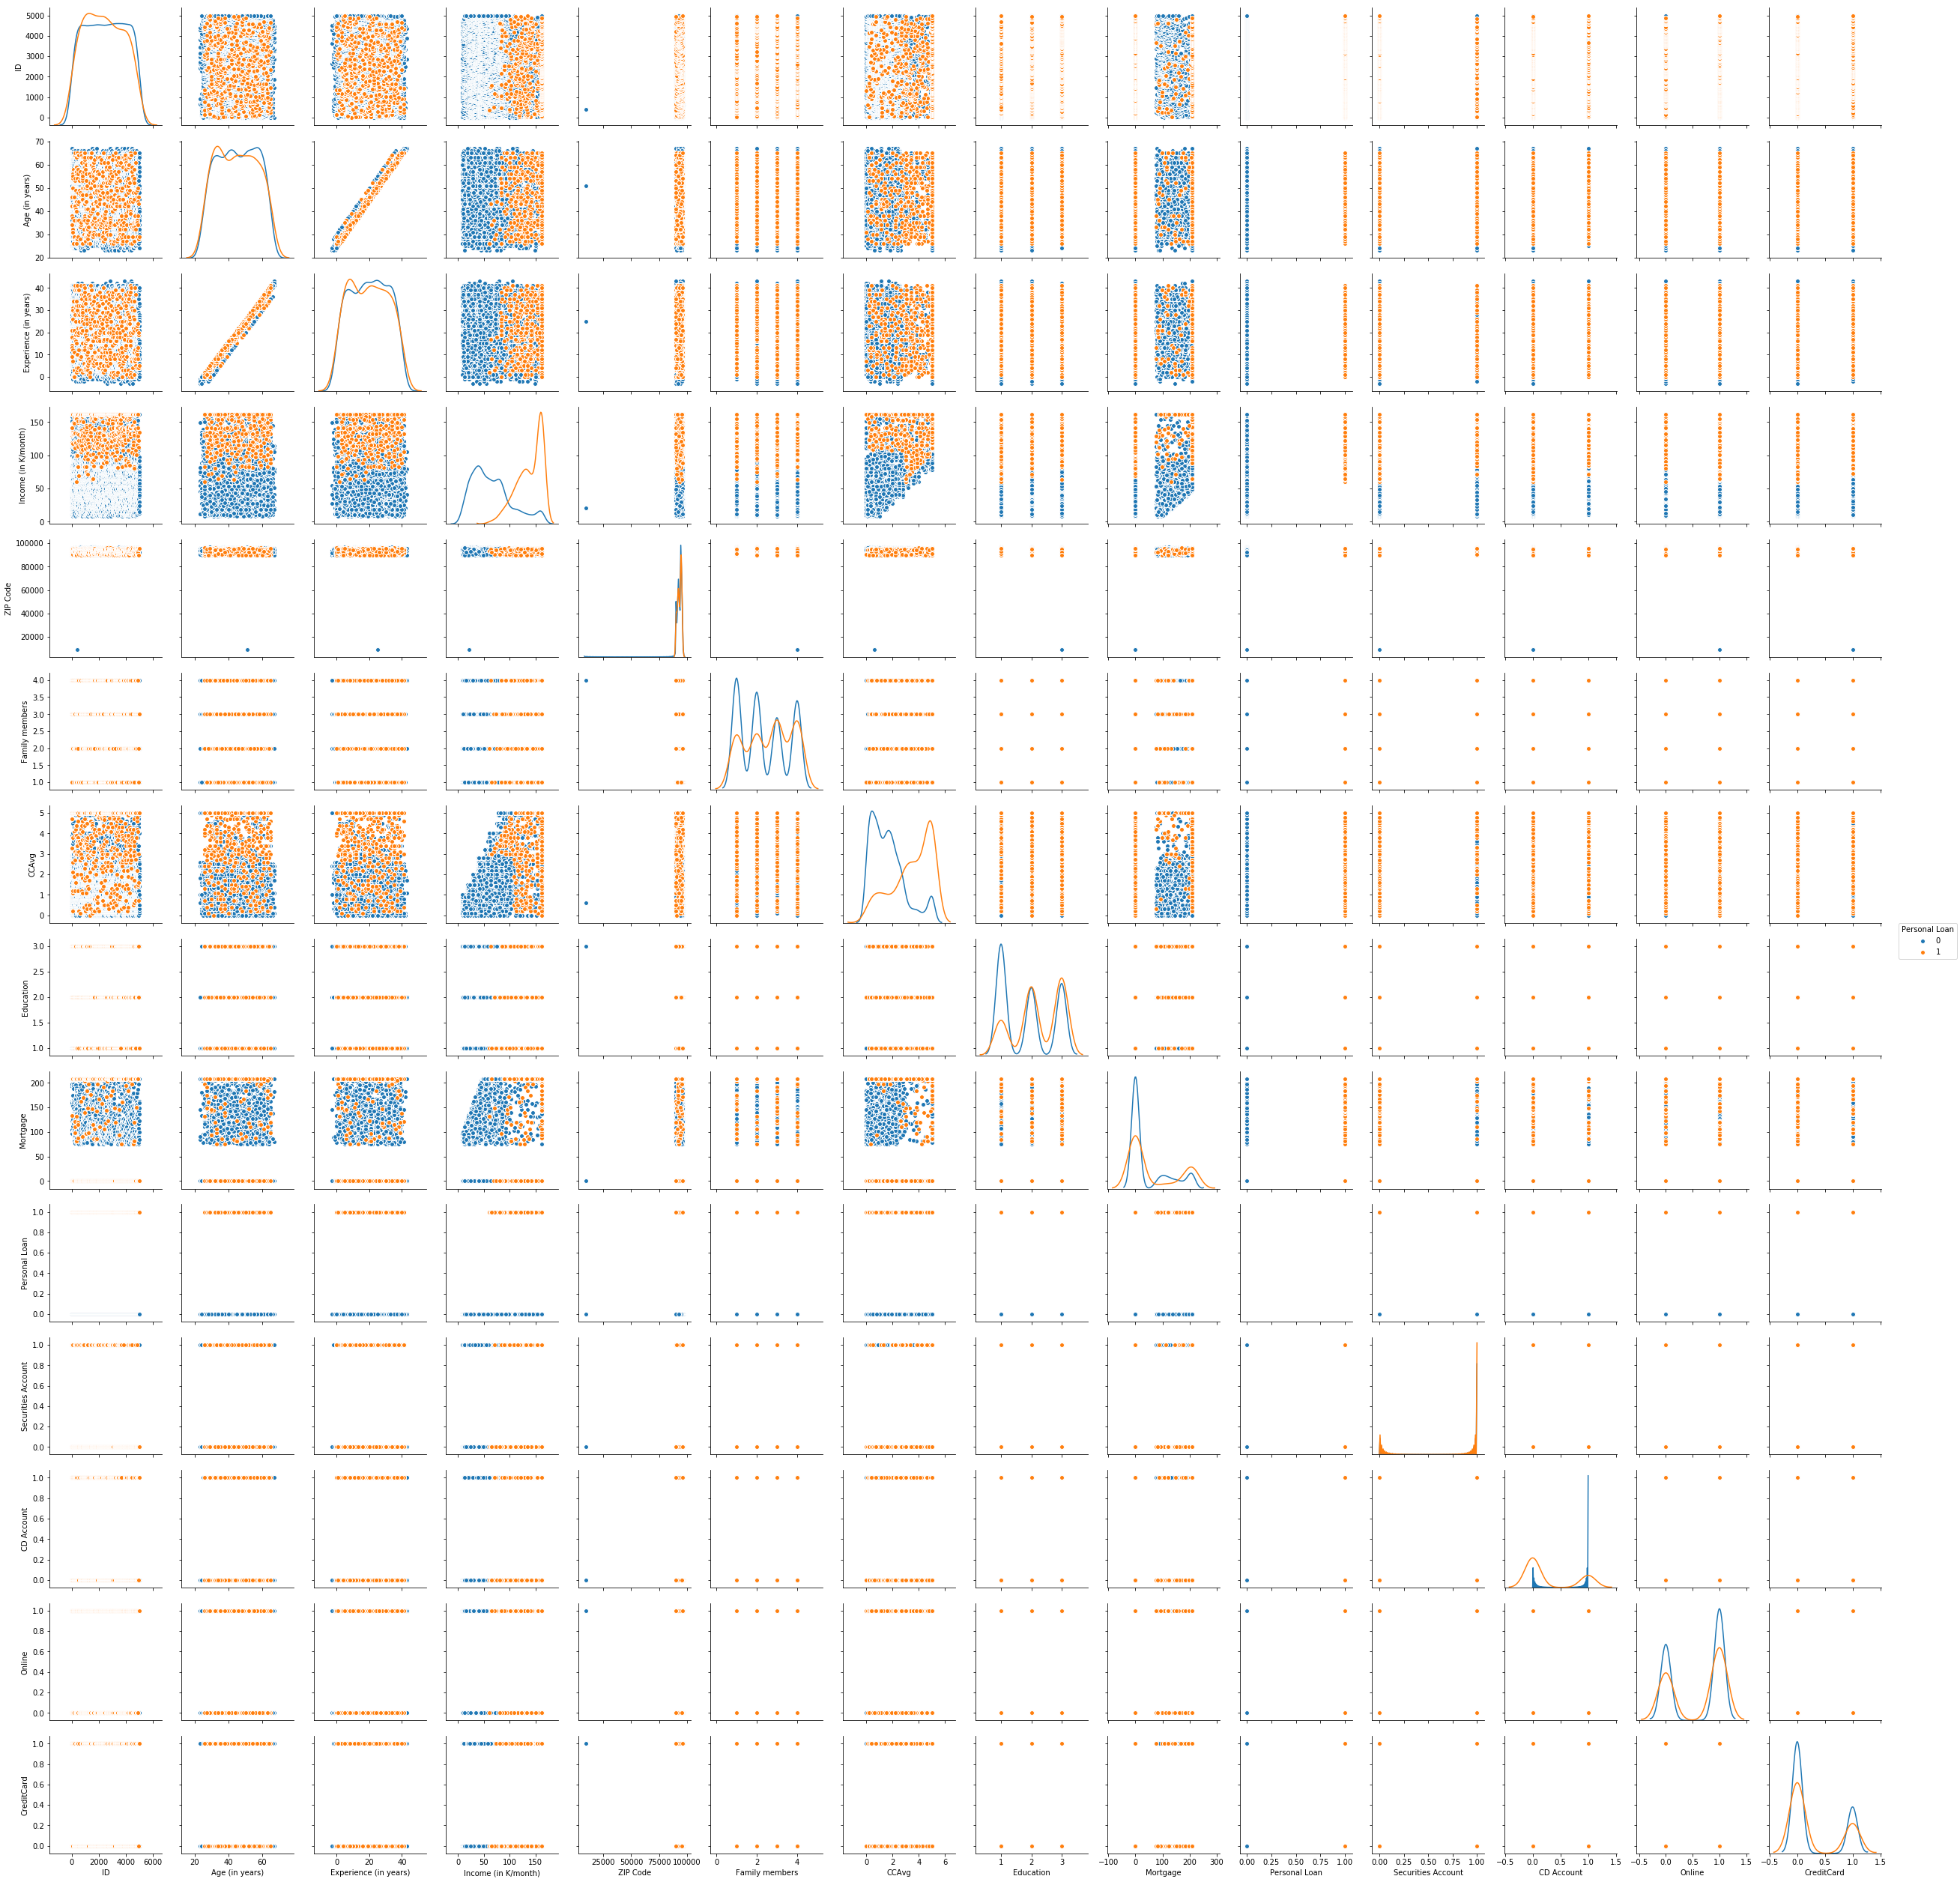

In [10]:
import seaborn as sns
% matplotlib inline
sns.pairplot(df,diag_kind='kde',hue='Personal Loan')

Removing ID and Zip Codes as they are Identifiers 

In [11]:
df=df.drop(['ID','ZIP Code'],axis=1)

In [12]:
df.corr()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age (in years),1.000000,0.994245,-0.053604,-0.045152,-0.051731,0.041643,-0.011227,-0.007748,-0.001707,0.008228,0.012825,0.008861
Experience (in years),0.994245,1.000000,-0.044696,-0.051398,-0.050610,0.013500,-0.009760,-0.007541,-0.002285,0.010380,0.012995,0.009988
Income (in K/month),-0.053604,-0.044696,1.000000,-0.158613,0.639078,-0.191694,0.103131,0.496567,-0.000319,0.166405,0.012490,-0.002068
Family members,-0.045152,-0.051398,-0.158613,1.000000,-0.104197,0.063264,-0.004572,0.061273,0.021674,0.013852,0.009851,0.009624
CCAvg,-0.051731,-0.050610,0.639078,-0.104197,1.000000,-0.126099,0.052226,0.382096,0.021453,0.141060,-0.004603,-0.007132
Education,0.041643,0.013500,-0.191694,0.063264,-0.126099,1.000000,-0.017451,0.136278,-0.011913,0.013776,-0.015396,-0.011870
Mortgage,-0.011227,-0.009760,0.103131,-0.004572,0.052226,-0.017451,1.000000,0.077002,-0.006680,0.062831,-0.006938,-0.002079
Personal Loan,-0.007748,-0.007541,0.496567,0.061273,0.382096,0.136278,0.077002,1.000000,0.022766,0.315762,0.005747,0.002154
Securities Account,-0.001707,-0.002285,-0.000319,0.021674,0.021453,-0.011913,-0.006680,0.022766,1.000000,0.316937,0.012994,-0.015310
CD Account,0.008228,0.010380,0.166405,0.013852,0.141060,0.013776,0.062831,0.315762,0.316937,1.000000,0.175760,0.277385


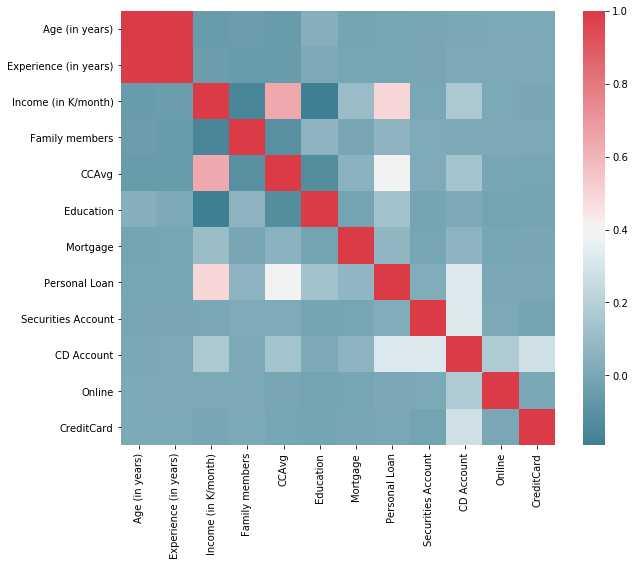

In [13]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
df=df.drop(['Experience (in years)','CCAvg'],axis=1)

1. The above heatmap shows that Personal Loan depends on Income,CCAvg, CD Account & Education other features do not have significant correlation with the Dependent variable i.e Personal Loan
2. Age & Experience have high collinearship and thus one can be dropped.
3. CCAvg & Income are highly collinear and since Personal Loan have more collinearity with Income we drop CCAvg
4. Creating model with all the variables then removing it one by one  to understand the variation in accuracy


creating dummies for Education,Family members 

In [15]:
df_dummies= pd.get_dummies(df, columns=['Family members','Education'])

In [16]:
df_dummies.columns

Index(['Age (in years)', 'Income (in K/month)', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family members_1.0', 'Family members_2.0', 'Family members_3.0',
       'Family members_4.0', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

droping one of the dummy class to avoid dummy trap

In [17]:
df_dummies=df_dummies.drop(['Family members_4.0','Education_3'],axis=1)

In [18]:
df_dummies.columns

Index(['Age (in years)', 'Income (in K/month)', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family members_1.0', 'Family members_2.0', 'Family members_3.0',
       'Education_1', 'Education_2'],
      dtype='object')

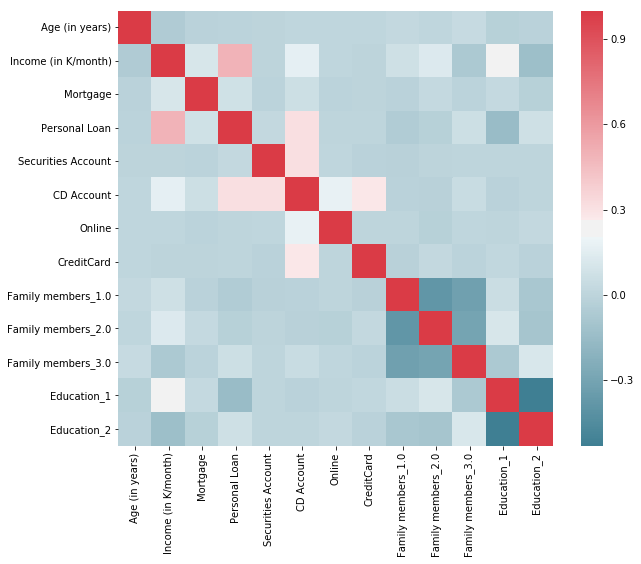

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_dummies.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Dummies shows high collinearity but nothing can be done for it.

### 3. Building Model

Splitting Data

In [20]:
X=df_dummies
X=X.drop('Personal Loan',axis=1)
Y=df_dummies['Personal Loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(3985, 12)
(997, 12)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4. Accuracy of the Model

In [22]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('model Score',model_score,'\n')
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_predict))

model Score 0.9679037111334002 

Confusion Matrix
 [[889   7]
 [ 25  76]]


In [23]:
# Clasification report
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       896
          1       0.92      0.75      0.83       101

avg / total       0.97      0.97      0.97       997



The Recall of Personal loan is 75% which means we are missing 25% marketing opportunity whereas precision is high 92% which means we are not wasting money in targetting wrong person.

Accuracy of the model is 96%

### 5. KNN Classifier

KNN algorith is distance based algorith thus we need to scale the data first before using it.

In [24]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train= std_scale.fit_transform(X_train)
X_test=std_scale.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
acc2=[]
recall2=[]
precision2=[]
f1_score2=[]

k=np.arange(1,20,2)
for k in k:
    NNH = KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    acc=NNH.score(X_test, y_test)
    recall=metrics.recall_score(y_test, predicted_labels)
    precision=metrics.precision_score(y_test, predicted_labels)
    f1_score=metrics.f1_score(y_test, predicted_labels)
    
    acc2.append(acc)
    recall2.append(recall)
    precision2.append(precision)
    f1_score2.append(f1_score)
    
    print('k=',k,' Score=',NNH.score(X_test, y_test),' Recall=',metrics.recall_score(y_test, predicted_labels),
          ' Precision=',metrics.precision_score(y_test, predicted_labels),
         'f1 Score=',metrics.f1_score(y_test, predicted_labels))

k= 1  Score= 0.9568706118355065  Recall= 0.7227722772277227  Precision= 0.8295454545454546 f1 Score= 0.7724867724867726
k= 3  Score= 0.9528585757271816  Recall= 0.6138613861386139  Precision= 0.8857142857142857 f1 Score= 0.7251461988304092
k= 5  Score= 0.9498495486459378  Recall= 0.5841584158415841  Precision= 0.8805970149253731 f1 Score= 0.7023809523809523
k= 7  Score= 0.9478435305917753  Recall= 0.5445544554455446  Precision= 0.9016393442622951 f1 Score= 0.6790123456790124
k= 9  Score= 0.9448345035105316  Recall= 0.49504950495049505  Precision= 0.9259259259259259 f1 Score= 0.6451612903225805
k= 11  Score= 0.9418254764292878  Recall= 0.46534653465346537  Precision= 0.9215686274509803 f1 Score= 0.618421052631579
k= 13  Score= 0.9408224674022067  Recall= 0.44554455445544555  Precision= 0.9375 f1 Score= 0.6040268456375839
k= 15  Score= 0.9348044132397192  Recall= 0.40594059405940597  Precision= 0.8913043478260869 f1 Score= 0.5578231292517007
k= 17  Score= 0.9277833500501504  Recall= 0.34

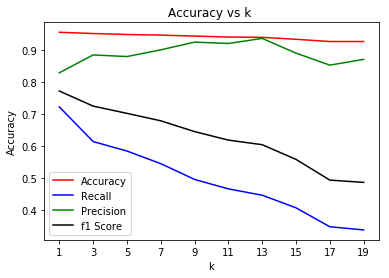

In [26]:

import matplotlib.pyplot as plt
plt.plot(np.arange(1,20,2),acc2,color='red',label='Accuracy')
plt.plot(np.arange(1,20,2),recall2,color='blue',label='Recall')
plt.plot(np.arange(1,20,2),precision2,color='green',label='Precision')
plt.plot(np.arange(1,20,2),f1_score2,color='black',label='f1 Score')
plt.xticks(np.arange(1,20,2))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k ')
plt.legend()
plt.show()

We get best Accuracy when value of k is 1 though precision is not the highest but Recall is good and f1 acore is satisfactory.

Compared with Linear Regression KNN performs poorly in this case as Accuracy, Precision and Recall for Linear Regression are more than KNN.

Thus For this case Linear Regression performs better.